In [1]:
import pandas as pd

# Cargar los datos desde el archivo CSV
df = pd.read_csv('/kaggle/input/dataseta/agua.csv')

# Procesamiento previo para realizar el cambio de fecha de unica entrada a entrada multiple
# df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d/%m/%y %H:%M')

# Extraemos el día, mes y año en nuevas columnas
# df['DIA'] = df['FECHA'].dt.day
# df['MES'] = df['FECHA'].dt.month
# df['YEAR'] = df['FECHA'].dt.year

# Guardamos el DataFrame modificado en un nuevo archivo CSV llamado agua2.csv
# df.to_csv('agua2.csv', index=False)

In [2]:
df['AGUA_ACTUAL'].describe()

count    683445.000000
mean         83.858831
std         217.041893
min           0.000000
25%           7.000000
50%          20.000000
75%          68.000000
max        3193.000000
Name: AGUA_ACTUAL, dtype: float64

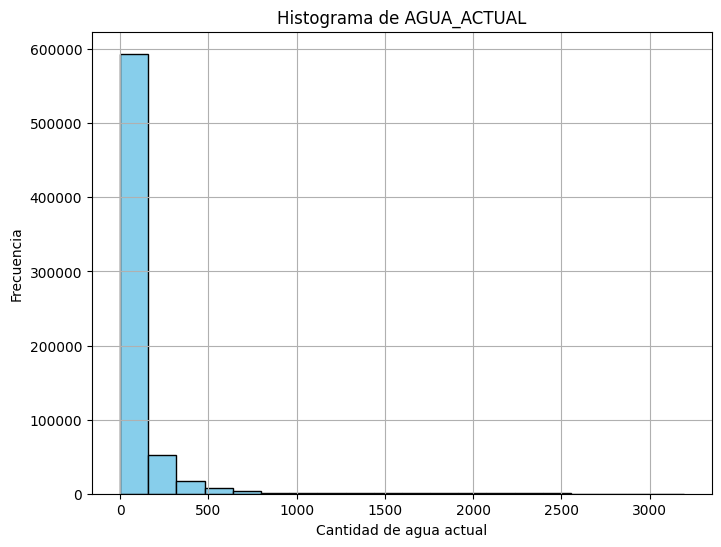

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['AGUA_ACTUAL'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de AGUA_ACTUAL')
plt.xlabel('Cantidad de agua actual')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [4]:
filas_mayor_500 = df[df['AGUA_ACTUAL'] > 500].shape[0]

print(f'Número de filas con AGUA_ACTUAL mayor a 500: {filas_mayor_500}')

Número de filas con AGUA_ACTUAL mayor a 500: 19844


In [5]:
df['MES'].describe()

count    683447.000000
mean          6.486642
std           3.440150
min           1.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: MES, dtype: float64

In [6]:
df['YEAR'].describe()

count    683447.000000
mean       2006.061417
std          10.615989
min        1987.000000
25%        1997.000000
50%        2006.000000
75%        2015.000000
max        2024.000000
Name: YEAR, dtype: float64

In [7]:
# Calculamos los percentiles 2% y 98% de la columna AGUA_ACTUAL
percentil_inferior = df['AGUA_ACTUAL'].quantile(0.02)
percentil_superior = df['AGUA_ACTUAL'].quantile(0.98)

# Filtramos el DataFrame eliminando los outliers
df_sin_outliers = df[(df['AGUA_ACTUAL'] >= percentil_inferior) & (df['AGUA_ACTUAL'] <= percentil_superior)]

# Mostramos información sobre los datos filtrados
print(f'Datos originales: {df.shape[0]} filas')
print(f'Datos sin outliers: {df_sin_outliers.shape[0]} filas')


Datos originales: 683447 filas
Datos sin outliers: 669791 filas


In [9]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dropeamos los valores nulos
df = df_sin_outliers.dropna()

# Separamos las características (X) de la variable objetivo (y)
X = df[['ID', 'MES', 'YEAR']]  # Asegúrate de que estas columnas existan en tu DataFrame
y = df['AGUA_ACTUAL']  # Asegúrate de que esta columna exista en tu DataFrame

# Dividimos los datos en train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo randomForest y lo entrenamos
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecimos
y_pred = model.predict(X_test)

# Evaluamos del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R²): {r2}')

# Realizamos las predicciones de los siguientes 12 meses
unique_ids = df['ID'].unique()  # Obtener los IDs únicos
predictions = []

for id in unique_ids:
    # Generar datos para los próximos 12 meses
    for month in range(1, 13):
        # Suponiendo que el último año en tus datos es el año actual
        last_year = df['YEAR'].max()
        input_data = {
            'ID': id,
            'MES': month,
            'YEAR': last_year + (1 if month <= 12 else 0)  # Incrementar el año si se pasa de diciembre
        }
        # Predecimos usando el modelo
        pred = model.predict(pd.DataFrame([input_data]))[0]
        predictions.append({
            'ID': id,
            'MES': month,
            'YEAR': last_year + (1 if month <= 12 else 0),
            'AGUA_PRED': pred
        })

# Convertir las predicciones a un DataFrame
predictions_df = pd.DataFrame(predictions)

# Mostrar las predicciones
print(predictions_df)

Error Cuadrático Medio (MSE): 55.689539790068046
Coeficiente de Determinación (R²): 0.9940322763431192
       ID  MES  YEAR  AGUA_PRED
0      18    1  2025  49.957514
1      18    2  2025  48.376940
2      18    3  2025  55.215440
3      18    4  2025  47.905107
4      18    5  2025  51.043298
...   ...  ...   ...        ...
4783  659    8  2025  24.592381
4784  659    9  2025  25.808000
4785  659   10  2025  25.808000
4786  659   11  2025  25.808000
4787  659   12  2025  25.808000

[4788 rows x 4 columns]


In [11]:
# Guardamos el dataframe en un csv
predictions_df.to_csv('predictions.csv', index=False)

print("Predicciones guardadas como 'predictions.csv'")

Predicciones guardadas como 'predictions.csv'
